In [1]:
%store -r dfc

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          371528 non-null  datetime64[ns]
 1   name                 371528 non-null  object        
 2   seller               371528 non-null  object        
 3   offerType            371528 non-null  object        
 4   price                371528 non-null  int64         
 5   abtest               371528 non-null  object        
 6   vehicleType          371528 non-null  object        
 7   yearOfRegistration   371528 non-null  int64         
 8   gearbox              371528 non-null  object        
 9   powerPS              371528 non-null  int64         
 10  model                371528 non-null  object        
 11  kilometer            371528 non-null  int64         
 12  monthOfRegistration  371528 non-null  int64         
 13  fuelType      

In [5]:
dfc.isnull().mean()*100

dateCrawled            0.0
name                   0.0
seller                 0.0
offerType              0.0
price                  0.0
abtest                 0.0
vehicleType            0.0
yearOfRegistration     0.0
gearbox                0.0
powerPS                0.0
model                  0.0
kilometer              0.0
monthOfRegistration    0.0
fuelType               0.0
brand                  0.0
notRepairedDamage      0.0
dateCreated            0.0
nrOfPictures           0.0
postalCode             0.0
lastSeen               0.0
dtype: float64

# 1) Can you tell me No of Vehicles by Brand Available on ebay for sale with the help of visualization

In [6]:
dfc.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

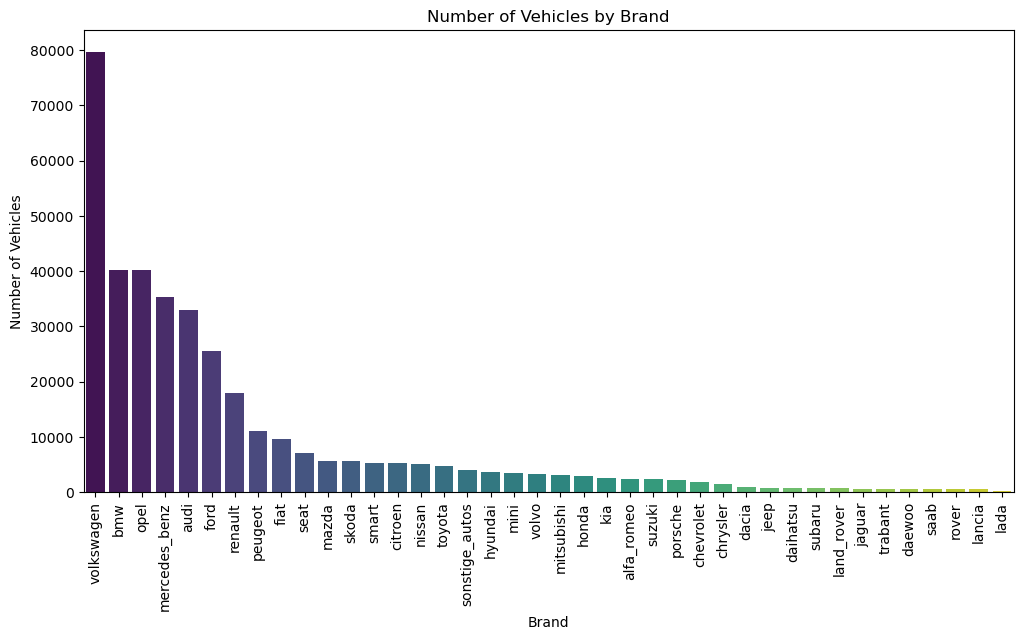

In [7]:
brand_counts = dfc['brand'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Number of Vehicles')
plt.title('Number of Vehicles by Brand')
plt.show()

# 2) What is the Average price for vehicles based on the type of vehicle as well as on the type of gearbox.Explain me with both numerical and visualization analysis

In [8]:
 avg_price = dfc.groupby(['vehicleType', 'gearbox'])['price'].mean()
print(avg_price)

vehicleType  gearbox    
andere       automatik        7366.861496
             manuell        825539.352000
             not defined      3661.203252
bus          automatik       10599.265713
             manuell          6321.168265
             not defined    124897.289820
cabrio       automatik       16254.374208
             manuell         14897.823880
             not defined      9751.342246
coupe        automatik       35500.199567
             manuell         12400.255031
             not defined    233553.441558
kleinwagen   automatik        3889.552200
             manuell          4606.752785
             not defined     33104.509510
kombi        automatik        8910.045892
             manuell          7464.627711
             not defined      3445.444699
limousine    automatik       19004.102243
             manuell          8505.151711
             not defined      3904.749183
no type      automatik        7600.924596
             manuell          8639.161862
         

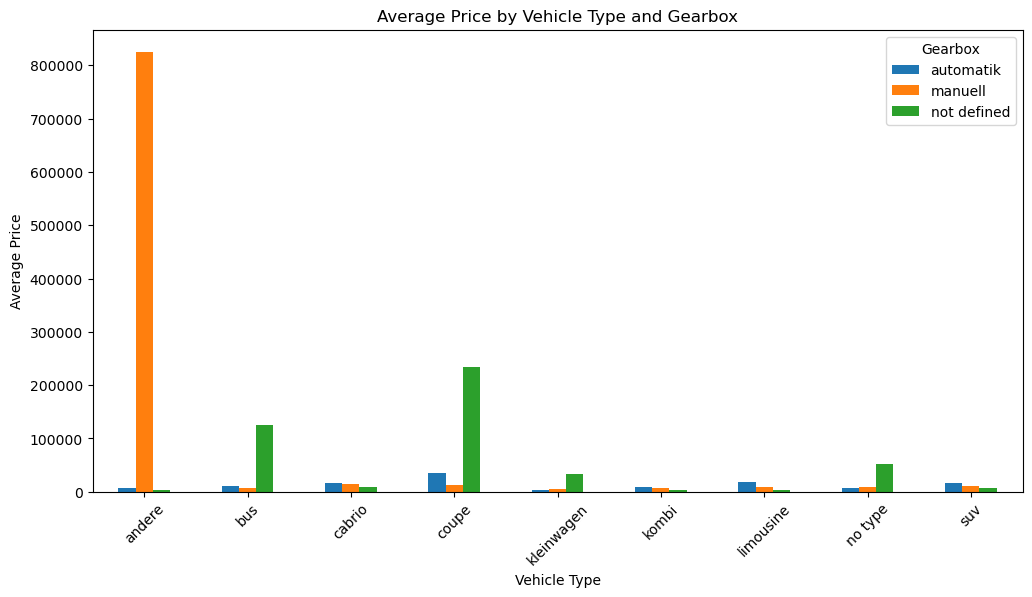

In [9]:

avg_price = dfc.groupby(['vehicleType', 'gearbox'])['price'].mean().unstack()

avg_price.plot(kind='bar', figsize=(12, 6))
plt.title('Average Price by Vehicle Type and Gearbox')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Gearbox', loc='upper right')
plt.show()

In [10]:
vehicle=dfc.groupby("vehicleType")
a=vehicle["price"].mean()
data_vehicles=pd.DataFrame(a.index)
data_vehicles["mean_of_prices"]=a.values
data_vehicles

,vehicleType,mean_of_prices
0,andere,677328.957700
1,bus,10302.742956
2,cabrio,15066.444013
3,coupe,25961.682040
4,kleinwagen,5694.229134
5,kombi,7741.217409
6,limousine,11116.186404
7,no type,20137.725263
8,suv,13242.822397


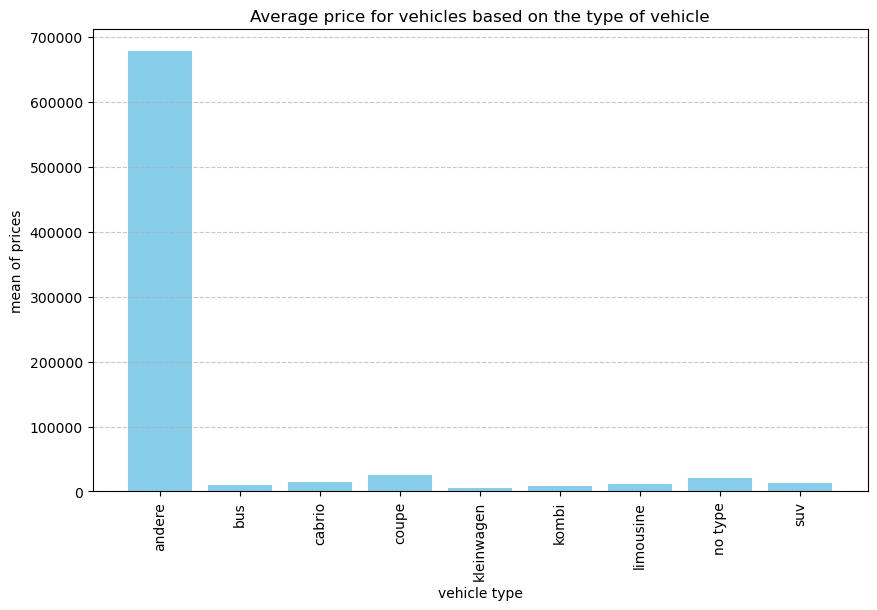

In [11]:
plt.figure(figsize=(10, 6))
a=data_vehicles["vehicleType"]
b=data_vehicles["mean_of_prices"]

plt.bar(a, b, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('vehicle type')
plt.ylabel('mean of prices')
plt.title('Average price for vehicles based on the type of vehicle')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [12]:
gearbox=dfc.groupby("gearbox")
b=gearbox["price"].mean()
data_gearbox=pd.DataFrame(b.index)
data_gearbox["mean_of_prices"]=b.values
data_gearbox

,gearbox,mean_of_prices
0,automatik,15146.603061
1,manuell,15929.785631
2,not defined,44019.021278


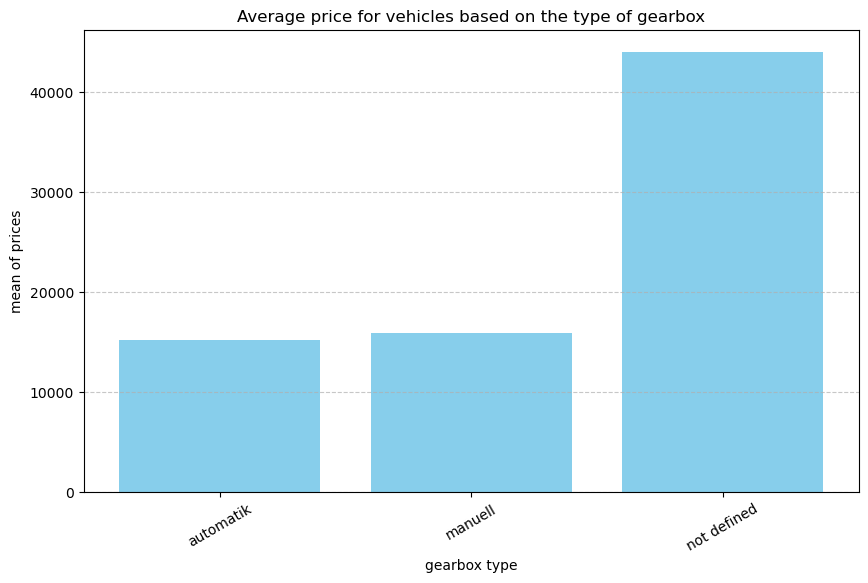

In [13]:
plt.figure(figsize=(10, 6))
a=data_gearbox["gearbox"]
b=data_gearbox["mean_of_prices"]

plt.bar(a, b, color='skyblue')
plt.xticks(rotation=30)
plt.xlabel('gearbox type')
plt.ylabel('mean of prices')
plt.title('Average price for vehicles based on the type of gearbox')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3) What is the marginal probability of private seller

In [14]:
pd.crosstab(index=dfc["seller"],columns= (dfc['seller'] == 'private'),normalize="all",margins=True)

seller,False,All
seller,,
gewerblich,0.000008,0.000008
privat,0.999992,0.999992
All,1.000000,1.000000
